## Diabetes clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_diabetes
df, _ = load_diabetes(return_X_y=True, as_frame=True)
df = df[['age', 'sex', 'bmi', 'bp']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
dtypes: float64(4)
memory usage: 13.9 KB


In [3]:
df.describe()

,age,sex,bmi,bp
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01


In [4]:
df_gender_1 = df.loc[df['sex'] < 0]
df_gender_1 = df_gender_1.drop(columns=['sex'])
df_gender_1

,age,bmi,bp
1,-0.001882,-0.051474,-0.026328
3,-0.089063,-0.011595,-0.036656
4,0.005383,-0.036385,0.021872
5,-0.092695,-0.040696,-0.019442
9,-0.070900,0.039062,-0.033213
...,...,...,...
434,0.016281,0.001339,0.008101
435,-0.012780,-0.023451,-0.040099
436,-0.056370,-0.074108,-0.050427
440,-0.045472,0.039062,0.001215


## K-means clustering
There are a few questions that we must answer before we start clustering:

1. Do we need to process the data first?
1. How many clusters should we use?
1. Which method should we use?

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# df = load_heart_disease()
df_scaled = df_gender_1.copy()

scaler = StandardScaler()
scaler.fit(df_scaled)
df_scaled = pd.DataFrame(scaler.transform(df_scaled), columns=df_scaled.columns)

kmeans = KMeans(n_clusters=3, random_state=54)
kmeans.fit(df_scaled)
# y_kmeans = kmeans.predict(df_scaled)
df_gender_1['clusters'] = kmeans.labels_
df_gender_1['clusters'] = df_gender_1['clusters'].astype('category') #makes seaborn use qualitative color palette

c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [6]:
df_gender_1.dtypes

age          float64
bmi          float64
bp           float64
clusters    category
dtype: object

In [7]:
centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=df_scaled.columns)
centers_scaled = pd.DataFrame(kmeans.cluster_centers_, columns=df_scaled.columns)
centers

,age,bmi,bp
0,0.026899,0.022049,0.053176
1,-0.048701,-0.046697,-0.040963
2,0.004199,0.016004,-0.029964


In [8]:
centers_scaled

,age,bmi,bp
0,0.728657,0.528532,1.317486
1,-0.860926,-0.869763,-0.622406
2,0.251375,0.405576,-0.395749


In [9]:
df_gender_1.describe()

,age,bmi,bp
count,235.000000,235.000000,235.000000
mean,-0.007756,-0.003936,-0.010759
std,0.047661,0.049269,0.048632
min,-0.107226,-0.084886,-0.112399
25%,-0.041840,-0.045007,-0.043542
50%,-0.001882,-0.009439,-0.022885
75%,0.023546,0.034212,0.021872
max,0.096197,0.160855,0.132044


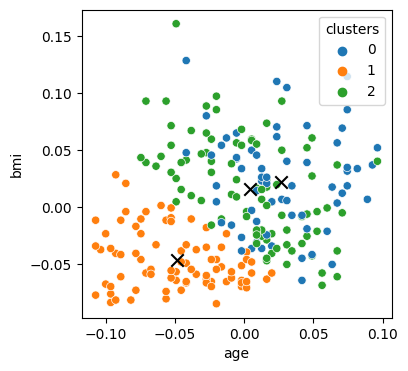

In [10]:
fig, ax = plt.subplots(figsize=(4,4))
ax = sns.scatterplot(x='age', y='bmi', hue='clusters', ax=ax, data=df_gender_1)

centers.plot.scatter(x='age', y='bmi', ax=ax, marker='x', s=80, color='black');

Counter({2: 89, 1: 81, 0: 65})


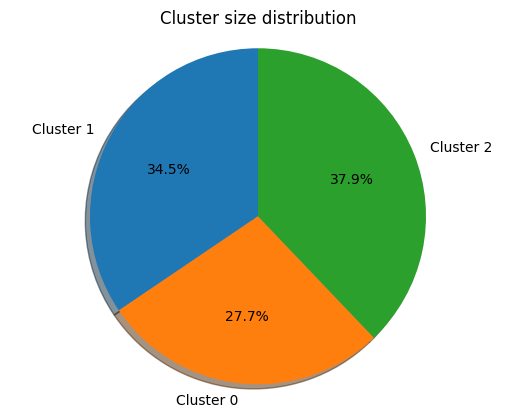

In [11]:
from collections import Counter
counts = Counter(kmeans.labels_)
print(counts)
fig1, ax1 = plt.subplots()
ax1.pie(counts.values(), labels=[f'Cluster {i}' for i in counts.keys()], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal');  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Cluster size distribution');

**Note:** Clusters are somewhat balanced.

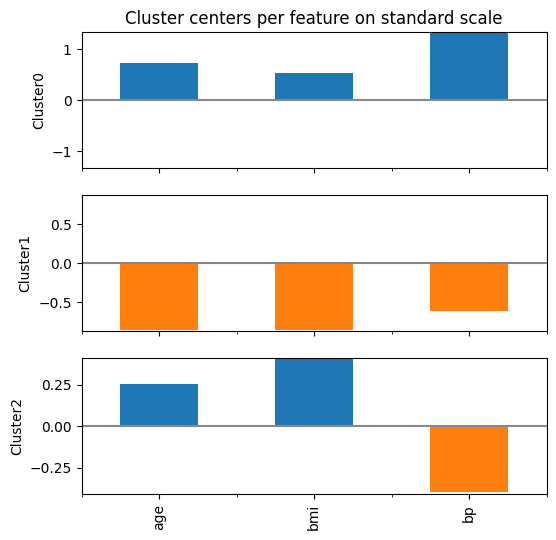

In [12]:
f, axes = plt.subplots(kmeans.n_clusters, 1, figsize=(6, 6), sharex=True)

for i, ax in enumerate(axes):
    center = centers_scaled.loc[i, :]
    maxPC = 1.01 * np.max(np.max(np.abs(center)))
    colors = ['C0' if l>0 else 'C1' for l in center]
    ax.axhline(color='#888888')
    center.plot.bar(ax=ax, color=colors)
    ax.set_ylabel(f'Cluster{i}')
    ax.set_ylim(-maxPC, maxPC)
    if i == 0:
        ax.set_title('Cluster centers per feature on standard scale')


**Note:** Typically, it is adviced to back transform the centers to original scale. It seems to me that leaving them on the standard scales helps interpretation.

For example, in the plot above, _Cluster 0_ contains patients with age well above average -> older individuals who have high bmi and high bp; _Cluster 1_ on the other hand has patients with age well below the average -> young individuals who have low bmi and low bp. Finally, _Cluster 2_ has average age patients with high bmi and low bp.

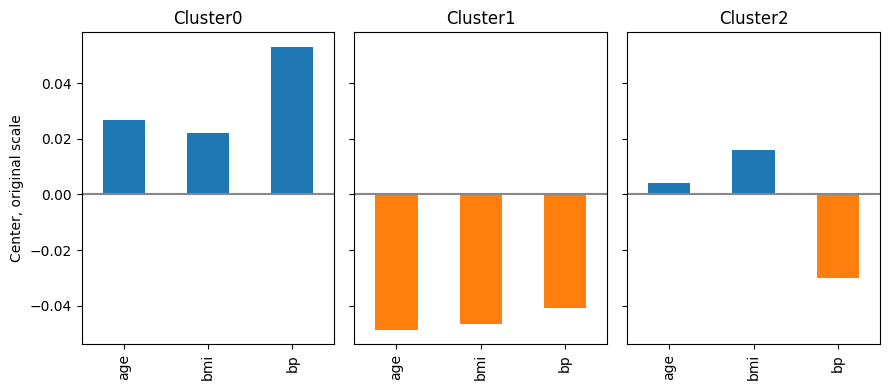

In [13]:
f, axes = plt.subplots(1, kmeans.n_clusters, figsize=(9, 4), sharey=True)

overall_max = centers.max().max()

for i, ax in enumerate(axes):
    center = centers.loc[i, :]
    colors = ['C0' if l>0 else 'C1' for l in center]
    ax.axhline(color='#888888')
    center.plot.bar(ax=ax, color=colors)
    ax.set_title(f'Cluster{i}')
    if i == 0:
        ax.set_ylabel('Center, original scale')

plt.tight_layout()

## Check Number of Clusters

We can use the elbow method to check the number of clusters.

c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

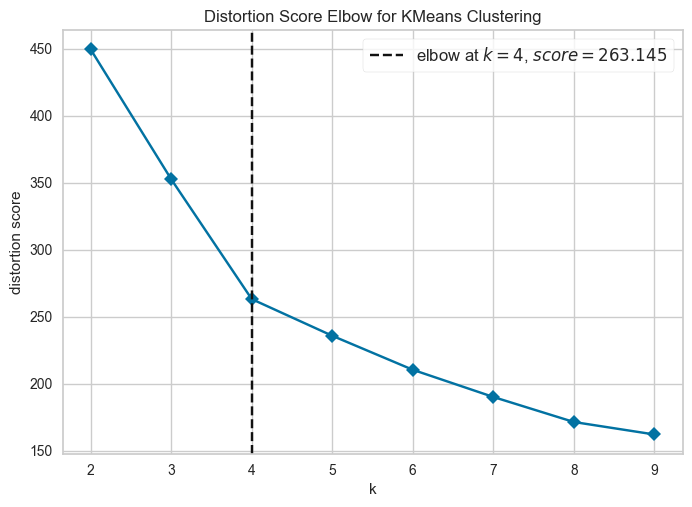

KElbowVisualizer(ax=<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=9, random_state=54), k=(2, 10),
                 timings=False)

In [14]:
from yellowbrick.cluster.elbow import kelbow_visualizer
kelbow_visualizer(KMeans(random_state=54), df_scaled, k=(2,10), 
                  metric='distortion',
                 timings=False)

c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

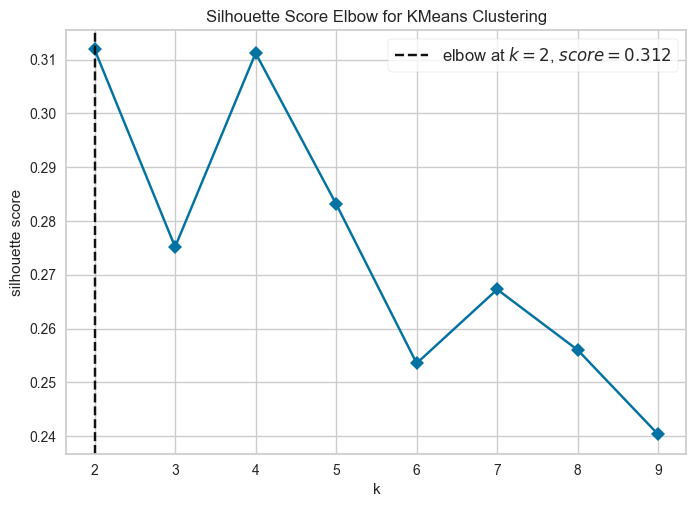

KElbowVisualizer(ax=<AxesSubplot: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>,
                 estimator=KMeans(n_clusters=9, random_state=54), k=(2, 10),
                 metric='silhouette', timings=False)

In [15]:
kelbow_visualizer(KMeans(random_state=54), df_scaled, k=(2,10), 
                  metric='silhouette',
                 timings=False)

c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

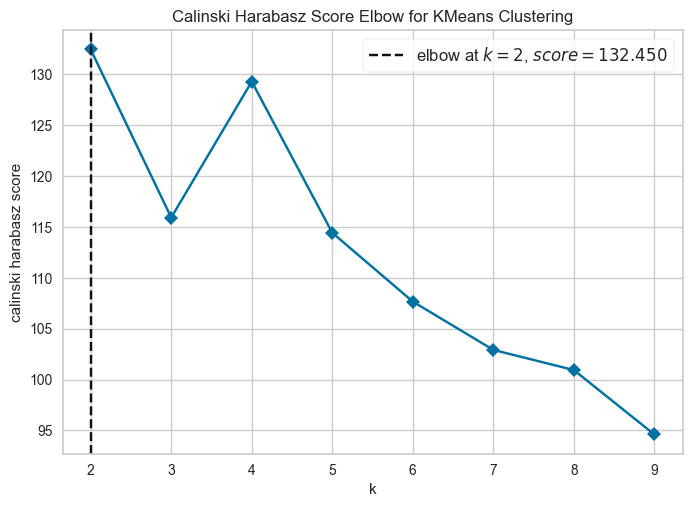

KElbowVisualizer(ax=<AxesSubplot: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>,
                 estimator=KMeans(n_clusters=9, random_state=54), k=(2, 10),
                 metric='calinski_harabasz', timings=False)

In [16]:
kelbow_visualizer(KMeans(random_state=54), df_scaled, k=(2,10), 
                  metric='calinski_harabasz',
                 timings=False)